# E-commerce data analyzis

### Dataset information

This Online Retail II data set contains all the transactions occurring for a UK-based and registered,  
non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware.
Many customers of the company are wholesalers.

link: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II


Attribute Information:

* InvoiceNo: id транзакции. Если id начинается с буквы "c" - заказ был отменен
* StockCode: код товара
* Description: название товара
* Quantity: количество товара за транзакцию
* InvoiceDate: дата и время выставления счета. День и время, когда была сгенерирована транзакция
* UnitPrice: цена за единицу товара в фунтах стерлингов (£)
* CustomerID: id клиента
* Country: название страны, в которой проживает клиент


# Exploratory Data Analysis summary

1. Клиент с наибольшим количеством заказов - из Великобритании
2. Клиент с потративший больше всего денег - из Нидерландов 
3. Компания получает наибольшее количество заказов от клиентов в Великобритании (поскольку это британская компания). Таким образом, ТОП-5 стран (включая Великобританию), которые размещают наибольшее количество заказов: 
    - Великобритания
	- Германия 
	- Франция
	- Ирландия (EIRE)
	- Испания
    
4. Поскольку компания получает наибольшее количество заказов от клиентов из Великобритании, английские клиенты тратят больше всего на свои покупки. Таким образом, ТОП-5 стран (включая Великобританию), которые тратят больше всего денег на покупки: 
    - Великобритания
	- Нидерланды
	- Ирландия (EIRE)
	- Германия
	- Франция
    
5. Самые высокие продажи зафиксированы в ноябре 2011 года
6. В период с 1 декабря 2010 года по 9 декабря 2011 года транзакций в субботу не проводилось. Возможно, это связано с тем, что в субботу компания не работала (что, вообще говоря, странно)
7. Количество заказов, полученных компанией, как правило, увеличивается с понедельника по четверг и уменьшается после этого
8. Компания получает наибольшее количество заказов в 12:00 
	- Возможно, большинство клиентов совершали покупки во время обеденного перерыва с 12:00 до 14:00
9. Компания, как правило, раздает БЕСПЛАТНЫЕ товары для покупок время от времени каждый месяц (кроме июня 2011 года) 
	- Однако неясно, какие факторы способствуют раздаче БЕСПЛАТНЫХ товаров конкретным клиентам

In [1]:
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'retina' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, 
          inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## Check missing values for each column 

In [7]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

## Remove rows with missing values

In [8]:
# df without missing values
df = df.dropna()

In [9]:
# check missing values for each column 
df.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [10]:
df['cust_id'] = df['cust_id'].astype('int64')

In [11]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [12]:
df['invoice_date'].min(), df['invoice_date'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [13]:
df['year_month'] = df['invoice_date'].dt.to_period('M')
df['week'] = df['invoice_date'].dt.week
df['day'] = df['invoice_date'].dt.day
df['weekday'] = df['invoice_date'].dt.day_name()
df['hour'] = df['invoice_date'].dt.hour

In [14]:
df['year_month'] = df['year_month'].astype(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
 8   year_month    406829 non-null  object        
 9   week          406829 non-null  int64         
 10  day           406829 non-null  int64         
 11  weekday       406829 non-null  object        
 12  hour          406829 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 43.5+ MB


In [16]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,year_month,week,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,48,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,48,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,48,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,48,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,48,1,Wednesday,8


In [17]:
df.describe()

,quantity,unit_price,cust_id,week,day,hour
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,30.936184,15.036128,12.737472
std,248.693370,69.315162,1713.600303,14.765548,8.653730,2.284952
min,-80995.000000,0.000000,12346.000000,1.000000,1.000000,6.000000
25%,2.000000,1.250000,13953.000000,19.000000,7.000000,11.000000
50%,5.000000,1.950000,15152.000000,34.000000,15.000000,13.000000
75%,12.000000,3.750000,16791.000000,44.000000,22.000000,14.000000
max,80995.000000,38970.000000,18287.000000,51.000000,31.000000,20.000000


## Remove Quantity with negative values

In [18]:
df = df[df.quantity > 0]

In [19]:
df.describe()

,quantity,unit_price,cust_id,week,day,hour
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,30.964629,15.042181,12.728247
std,180.420210,22.096788,1713.169877,14.755880,8.653771,2.273535
min,1.000000,0.000000,12346.000000,1.000000,1.000000,6.000000
25%,2.000000,1.250000,13969.000000,19.000000,7.000000,11.000000
50%,6.000000,1.950000,15159.000000,34.000000,15.000000,13.000000
75%,12.000000,3.750000,16795.000000,44.000000,22.000000,14.000000
max,80995.000000,8142.750000,18287.000000,51.000000,31.000000,20.000000


## Add the column - amount_spent

In [20]:
df['amount_spent'] = df['quantity'] * df['unit_price']

# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

### Check TOP 5 most number of orders

In [21]:
orders = df.groupby(by=['cust_id', 'country'], as_index=False)['invoice_num'].count()
orders.sort_values(by='invoice_num', ascending=False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


In [22]:
orders['invoice_num'].describe()

count    4347.000000
mean       91.539913
std       228.596627
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: invoice_num, dtype: float64

## How much money spent by the countries?

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:
money_spent = df.groupby(by=['country'], as_index=False)['amount_spent'].sum().sort_values('amount_spent', ascending=False)
money_spent.head()

,country,amount_spent
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050


In [25]:
money_spent.tail()

,country,amount_spent
4,Brazil,1143.600
27,RSA,1002.310
8,Czech Republic,826.740
2,Bahrain,548.400
28,Saudi Arabia,145.920


# Discover patterns for Number of Orders

## How many orders (per month)?

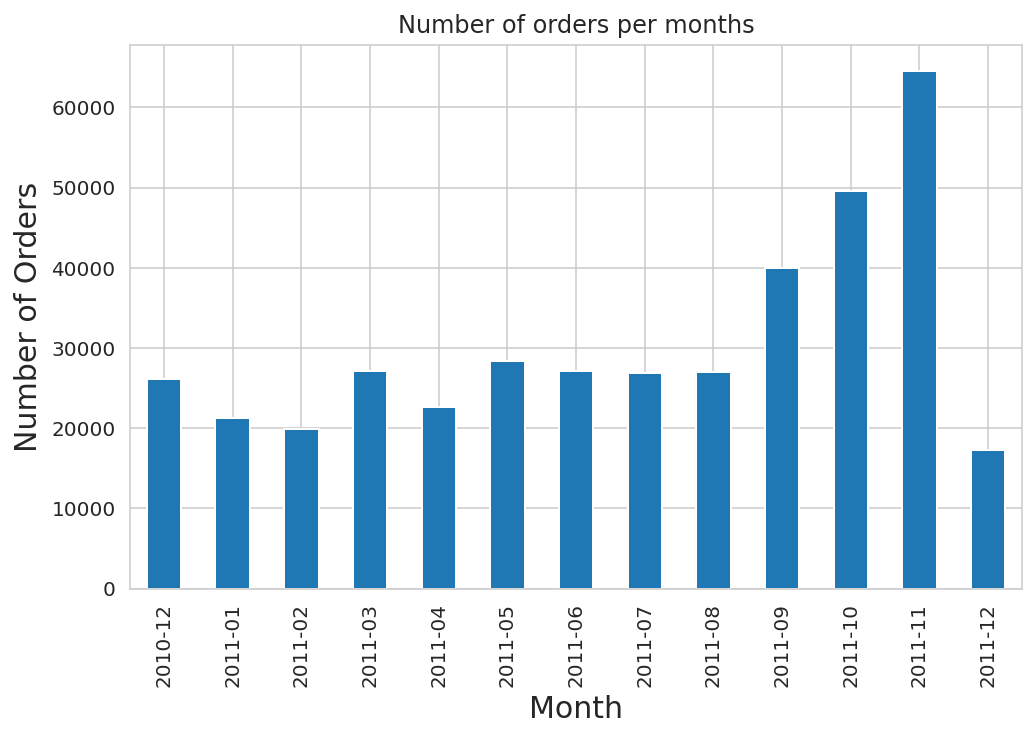

In [26]:
df.groupby('year_month')['invoice_num'].count().plot(kind='bar')
plt.title('Number of orders per months')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15);

Больше всего заказов - под конец года

 ## How many orders weekday?

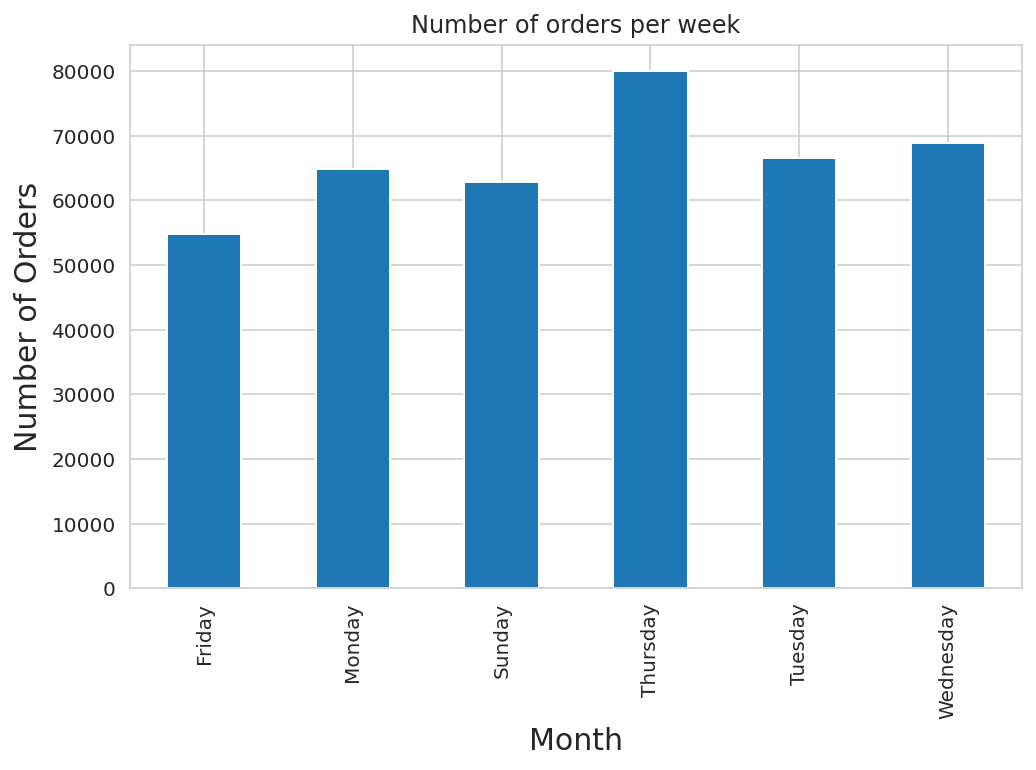

In [27]:
df.groupby('weekday')['invoice_num'].count().plot(kind='bar')
plt.title('Number of orders per week')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15);

Люди чаще делали заказы по четвергам. Видимо, по субботам магазин не работал (?)

## Frequency of Day of week Vs Hour of day

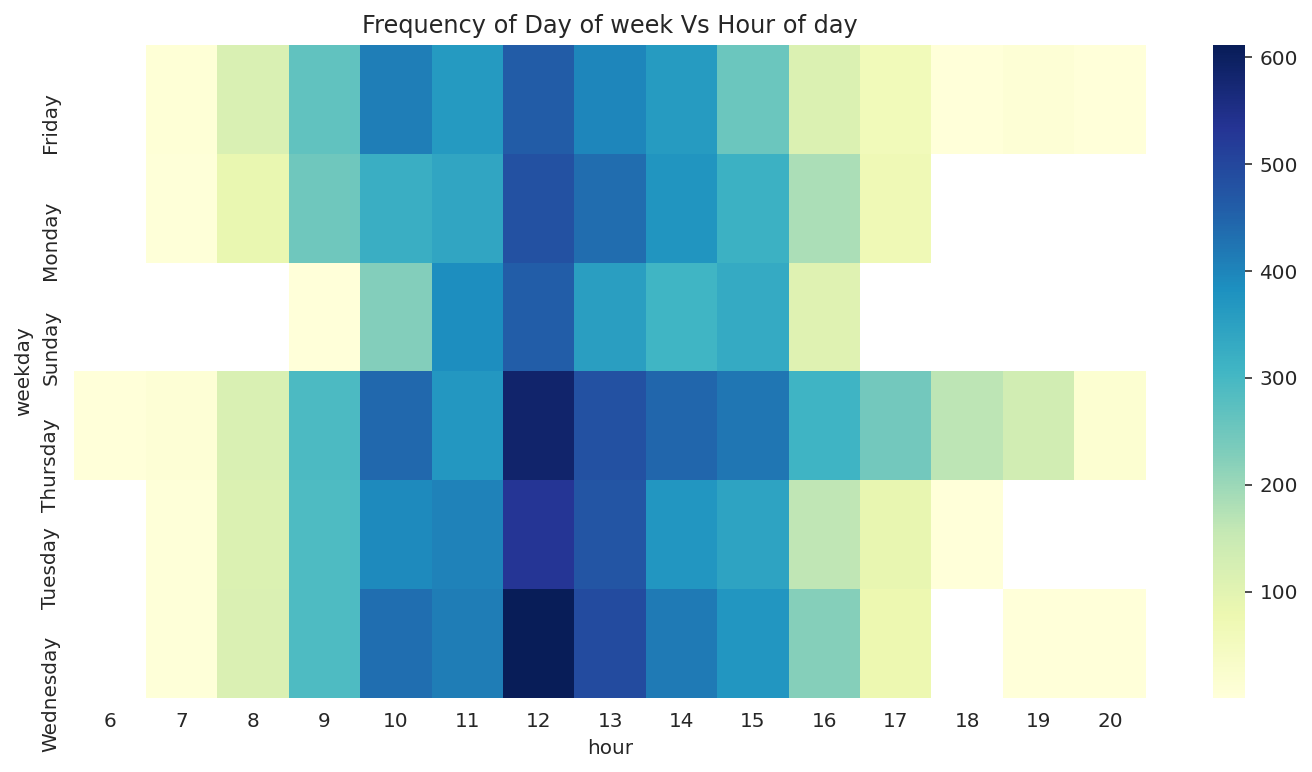

In [28]:
grouped_df  = df.groupby(["weekday", "hour"])["invoice_num"].unique().reset_index()
grouped_df["invoice_num"] = grouped_df["invoice_num"].apply(len)

grouped_df = grouped_df.pivot('weekday', 'hour', 'invoice_num')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()


# Discover patterns for Unit Price

In [29]:
df.unit_price.describe()

count   397924.000
mean         3.116
std         22.097
min          0.000
25%          1.250
50%          1.950
75%          3.750
max       8142.750
Name: unit_price, dtype: float64

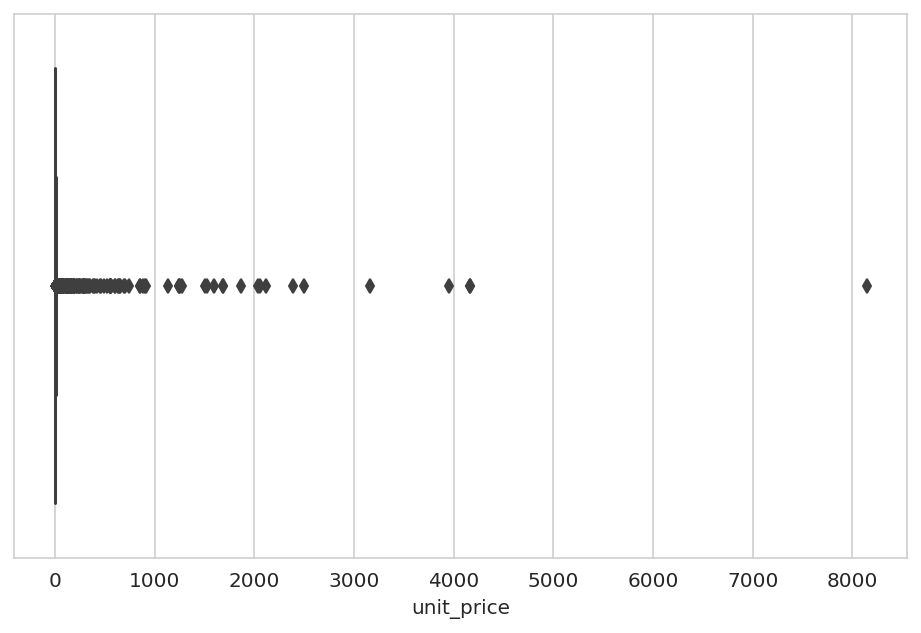

In [30]:
# check the distribution of unit price
sns.boxplot(df['unit_price']);

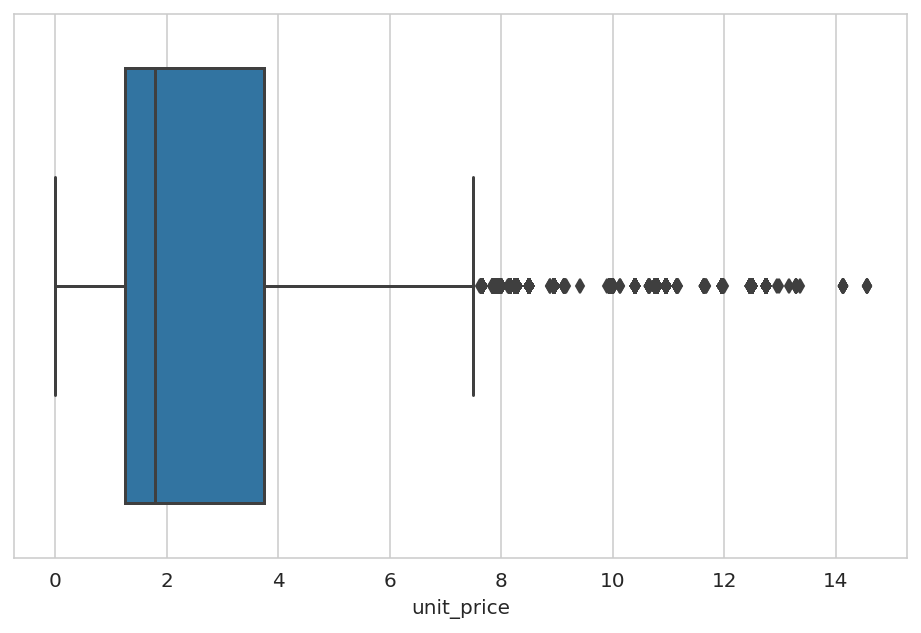

In [31]:
upper_bound = np.percentile(df['unit_price'], 99)

sns.boxplot(df[df['unit_price'] < upper_bound]['unit_price']);

In [32]:
free_goods = df[df.unit_price == 0]
free_goods.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,year_month,week,day,weekday,hour,amount_spent
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.000,12647,Germany,2010-12,48,5,Sunday,14,0.000
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.000,16560,United Kingdom,2010-12,50,16,Thursday,14,0.000
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.000,14911,EIRE,2010-12,51,21,Tuesday,13,0.000
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.000,13081,United Kingdom,2011-01,1,6,Thursday,16,0.000
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.000,13081,United Kingdom,2011-01,1,6,Thursday,16,0.000


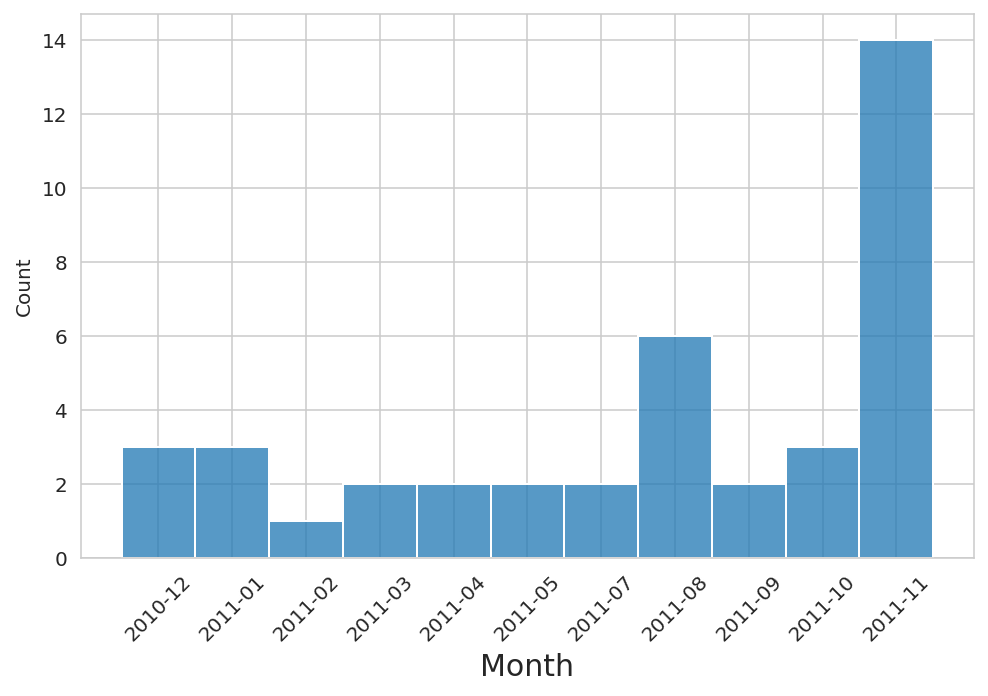

In [33]:
# В какие месяцы были бесплатные товары?
sns.histplot(x='year_month', data=free_goods)
plt.xticks(rotation=45)
plt.xlabel('Month',fontsize=15);

В среднем компания выдавала клиентам БЕСПЛАТНЫЕ товары 2-4 раза в месяц, чаще под новогодние праздники.

# Discover patterns for each Country

In [34]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,year_month,week,day,weekday,hour,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom,2010-12,48,1,Wednesday,8,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom,2010-12,48,1,Wednesday,8,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340


## How many orders for each country?

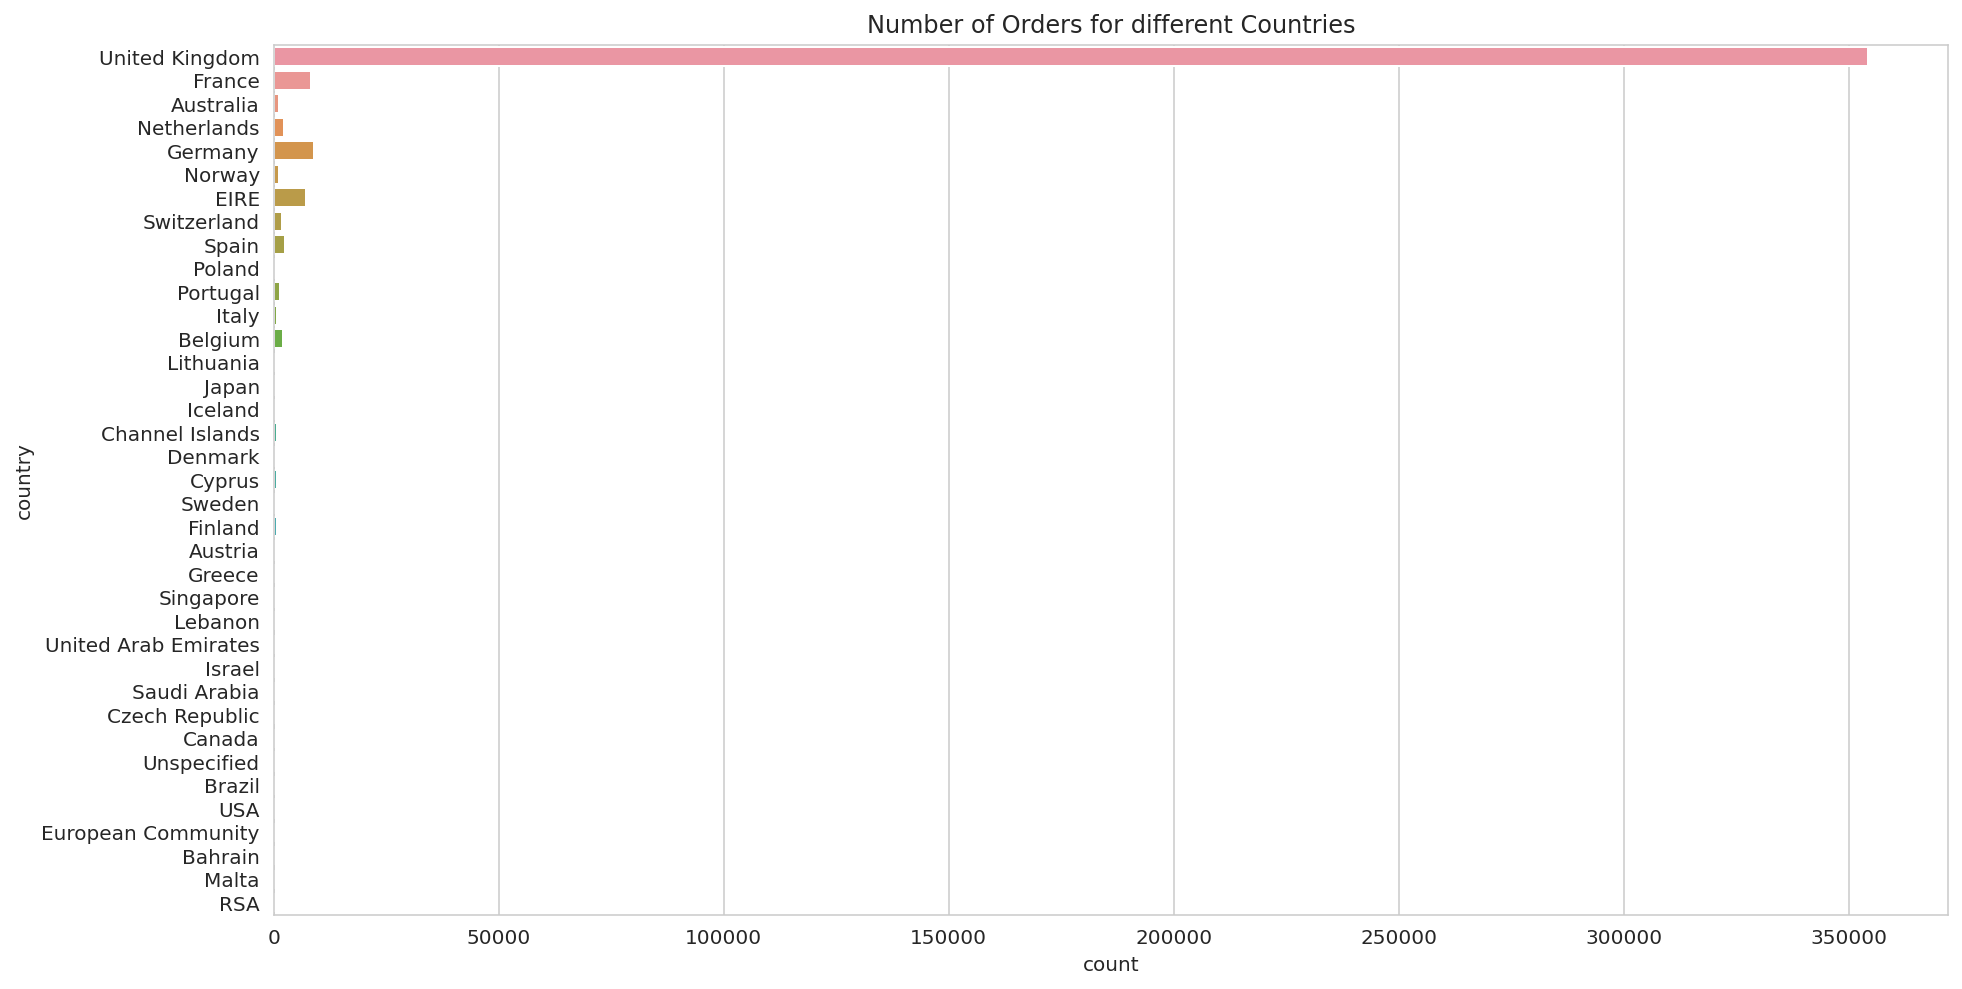

In [35]:
plt.subplots(figsize=(15,8))
plt.title('Number of Orders for different Countries', fontsize=12)
sns.countplot(y='country', data=df);

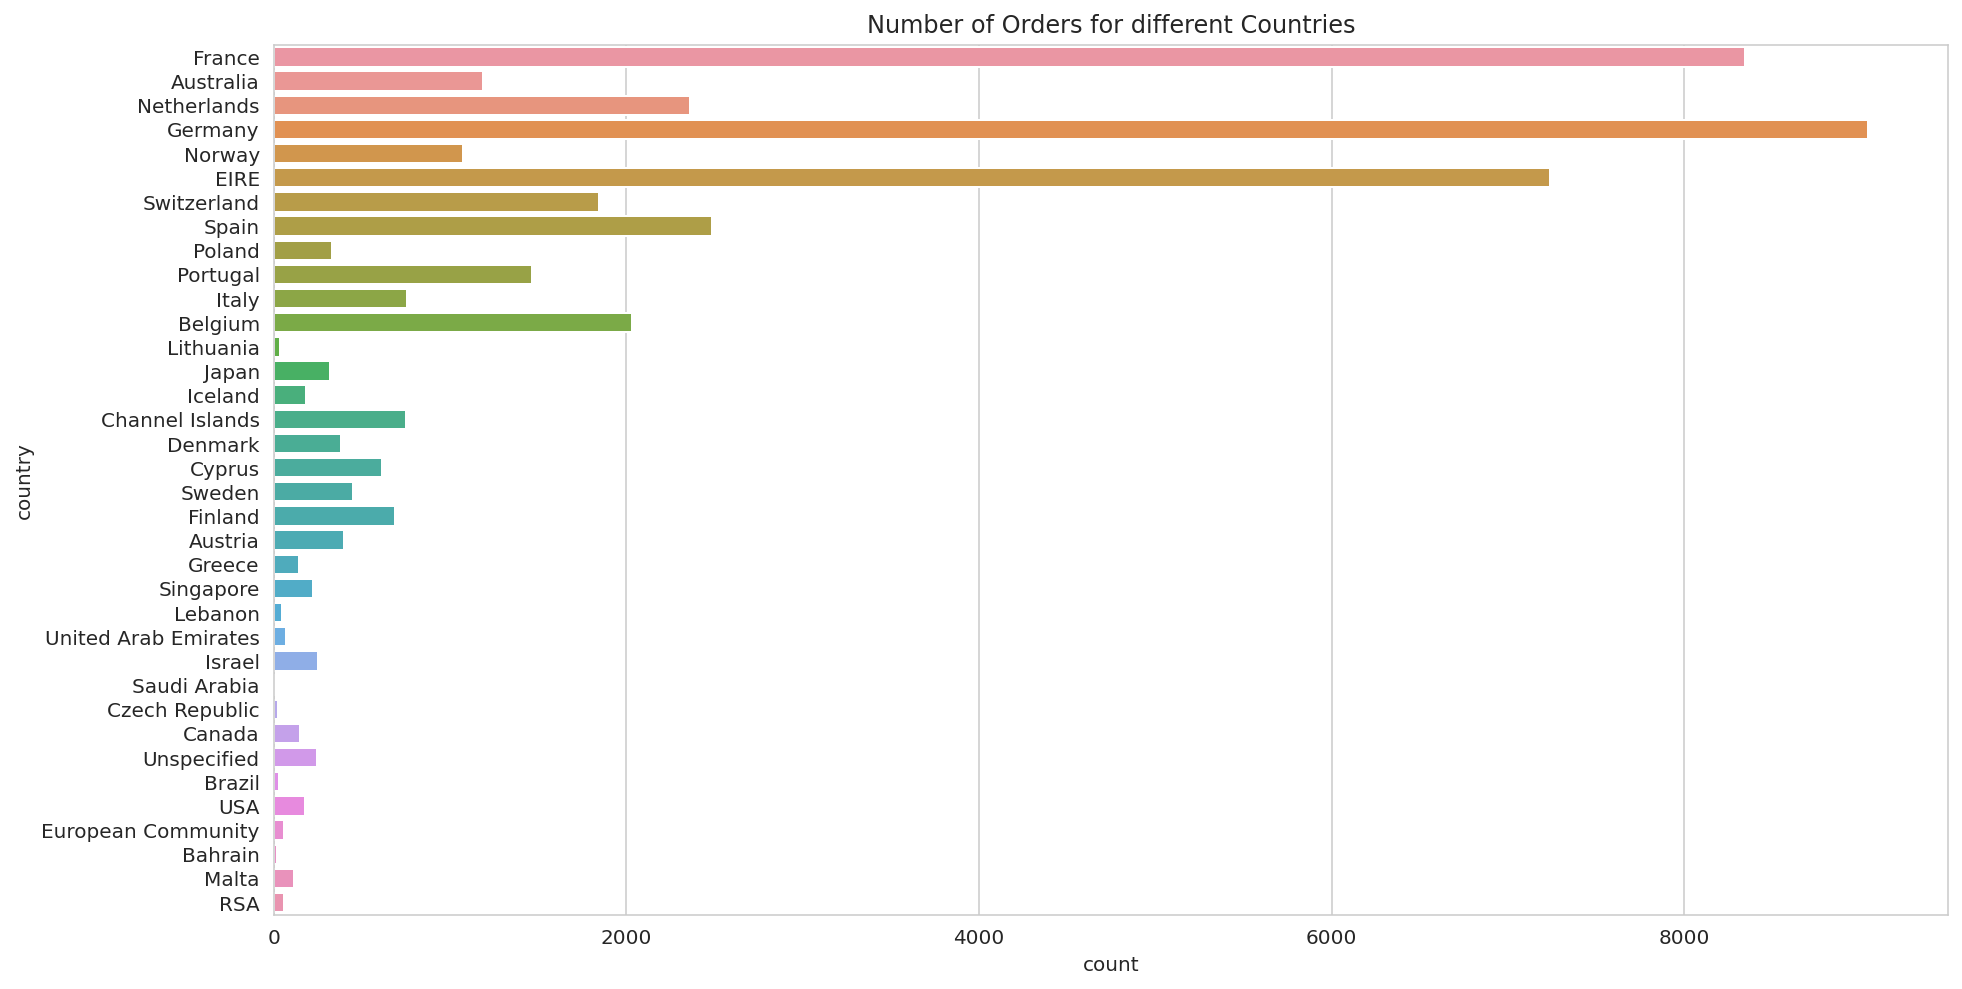

In [36]:
plt.subplots(figsize=(15,8))
plt.title('Number of Orders for different Countries', fontsize=12)
sns.countplot(y='country', data=df[df['country']!='United Kingdom']);

После UK по объему покупок идут ближайшие к UK страны ЕС: Франция, Австрия, Голландия, Германия и др 

## How much money spent by each country?

In [37]:
group_country_amount_spent = df.groupby('country')['amount_spent'].sum().sort_values(ascending=False).reset_index()
group_country_amount_spent.head()

,country,amount_spent
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050


In [38]:
group_country_amount_spent['amount_spent'].describe()

count        37.000
mean     240848.862
std     1196639.361
min         145.920
25%        2667.070
50%       13590.380
75%       38378.330
max     7308391.554
Name: amount_spent, dtype: float64

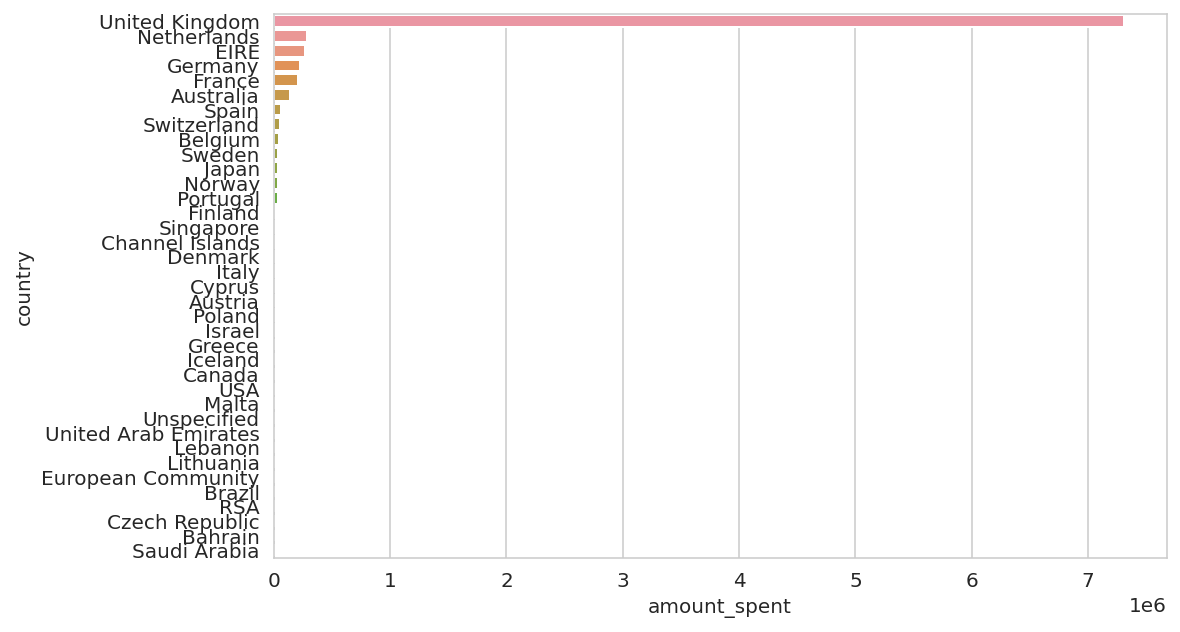

In [39]:
sns.barplot(y="country", x="amount_spent", data=group_country_amount_spent);

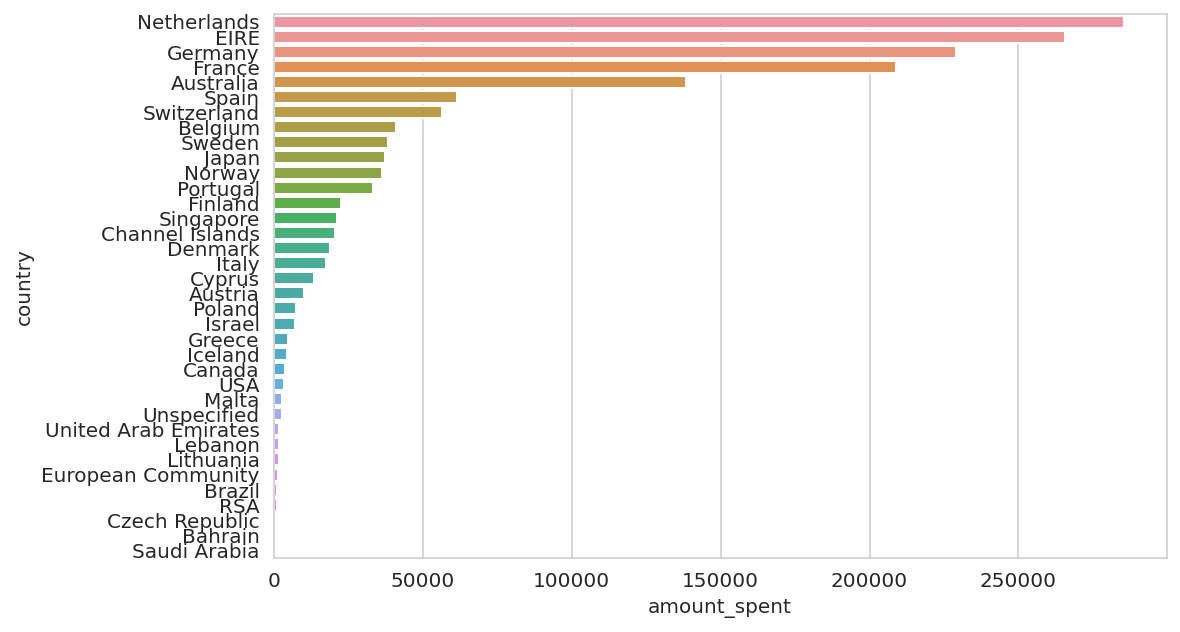

In [40]:
sns.barplot(y="country", x="amount_spent", data=group_country_amount_spent[group_country_amount_spent['country']!='United Kingdom']);

## Total Sales (First order vs Reorder)

In [41]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,year_month,week,day,weekday,hour,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom,2010-12,48,1,Wednesday,8,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom,2010-12,48,1,Wednesday,8,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340


In [42]:
df['quantity'].describe()

count   397924.000
mean        13.022
std        180.420
min          1.000
25%          2.000
50%          6.000
75%         12.000
max      80995.000
Name: quantity, dtype: float64

In [43]:
df['unit_price'].describe()

count   397924.000
mean         3.116
std         22.097
min          0.000
25%          1.250
50%          1.950
75%          3.750
max       8142.750
Name: unit_price, dtype: float64

In [44]:
df['total_dollars'] = df['quantity']*df['unit_price']

In [45]:
#First Item Order
df_sort = df.sort_values(['cust_id', 'stock_code', 'invoice_date'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['stock_code'] == df_sort_shift1['stock_code'], 1,0)
df_sort_reorder.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,year_month,week,day,weekday,hour,amount_spent,total_dollars,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346,United Kingdom,2011-01,3,18,Tuesday,10,77183.600,77183.600,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.250,12347,Iceland,2011-04,14,7,Thursday,10,6.000,6.000,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.300,12347,Iceland,2011-06,23,9,Thursday,13,10.800,10.800,0
148289,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.950,12347,Iceland,2011-04,14,7,Thursday,10,17.700,17.700,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26 14:30:00,0.850,12347,Iceland,2011-01,4,26,Wednesday,14,8.500,8.500,0


In [46]:
#Top 10 Reorder item
pd.DataFrame((df_sort_reorder.groupby(['description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
description,
WHITE HANGING HEART T-LIGHT HOLDER,1172
JUMBO BAG RED RETROSPOT,983
REGENCY CAKESTAND 3 TIER,843
LUNCH BAG RED RETROSPOT,785
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,730
PARTY BUNTING,689
LUNCH BAG BLACK SKULL.,647
LUNCH BAG SUKI DESIGN,621


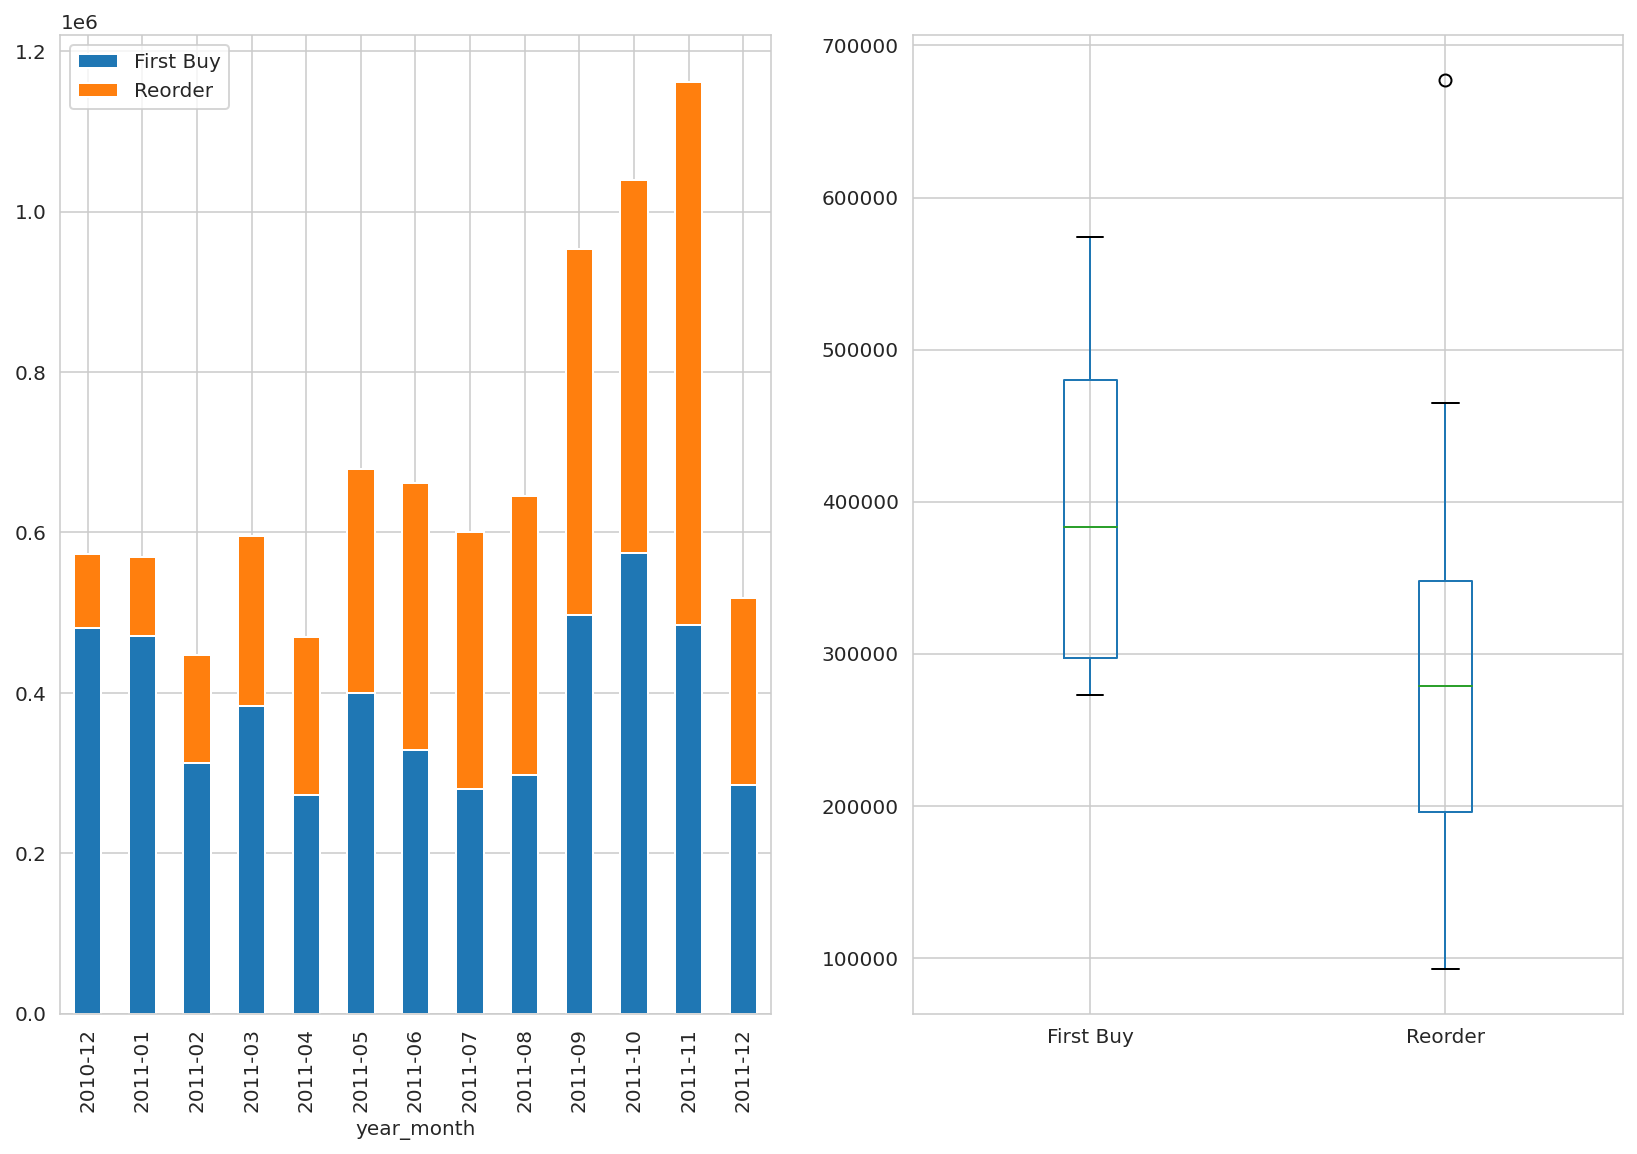

In [47]:
# Sales by Month
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['year_month'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['year_month'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1]);

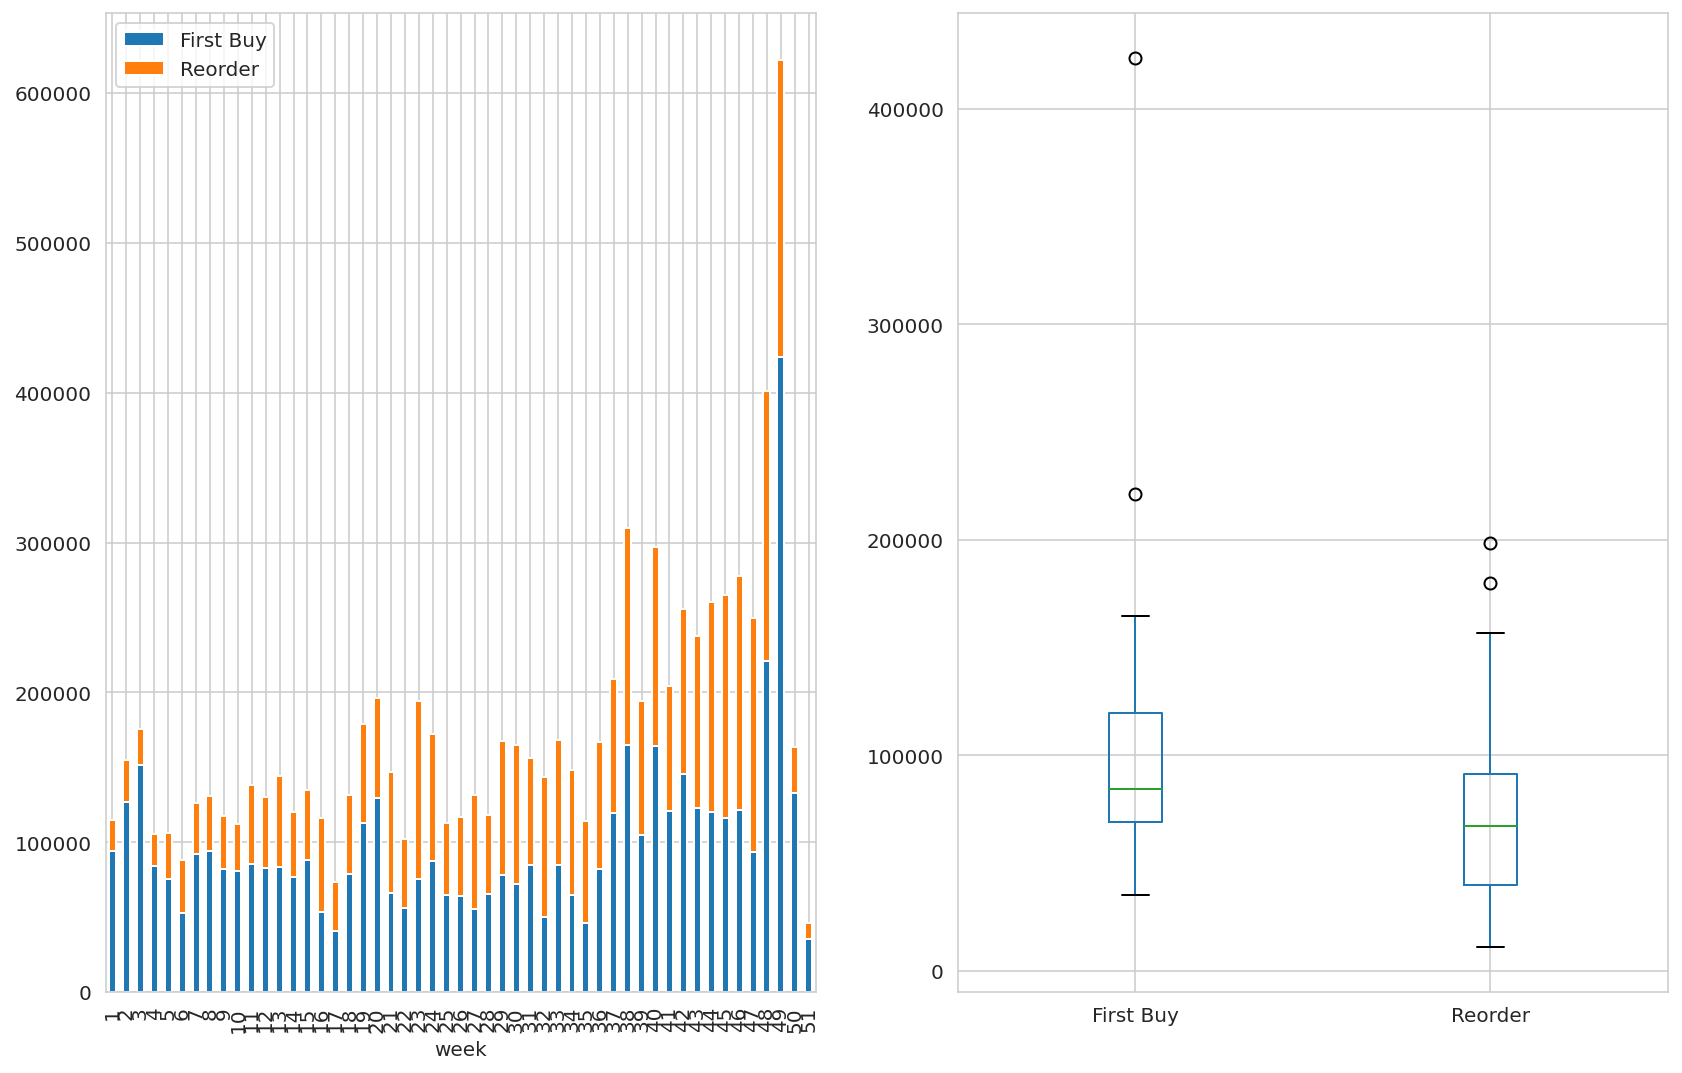

In [48]:
# Sales by Week
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['week'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['week'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1]);